# Creating DS1

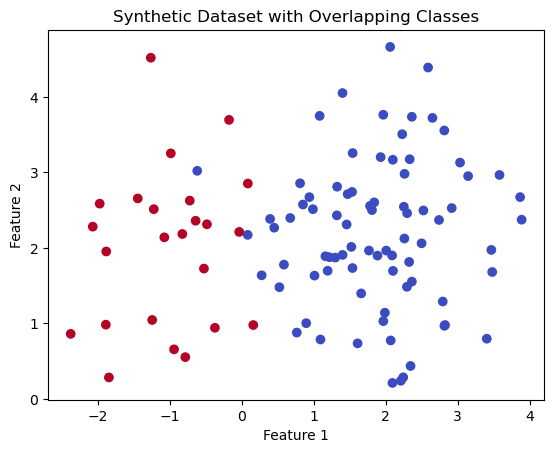

In [85]:

import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate 50 points for class 0
X0 = np.random.randn(80, 2) + np.array([2, 2.2])
y0 = np.zeros(80)

# Generate 50 points for class 1
X1 = np.random.randn(24, 2) + np.array([-1, 1.8])
y1 = np.ones(24)


# Combine the datasets
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Synthetic Dataset with Overlapping Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Training SVM 

In [115]:
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Train SVM with different values of C
C_values = [0.01, 0.1, 1, 10, 100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
for C in C_values:
    clf = SVC(kernel='linear', C=C, probability=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores = accuracy_score(y_pred, y_test)
    print(scores)
    plot_decision_boundary(clf, X_train, y_train, f"SVM with C={C}")

[0.736175 0.160138 0.632488 0.192396 0.706221 0.597926 0.173963 0.319124
 0.153226 0.176267 0.137097 0.752304 0.802995 0.464286 0.457373 0.353687
 0.339862 0.554147 0.107143 0.508065 0.867512 0.289171 0.521889 0.957373
 0.664747 0.948157 0.141705 0.998848 0.10023  0.989631 0.579493 0.53341
 0.563364 0.699309 0.282258 0.517281 0.766129 0.266129 0.989631 0.498848
 0.448157 0.904378 0.745392 0.678571 0.434332 0.782258 0.574885 0.685484
 0.842166 0.726959 0.551843 0.332949 0.374424 0.915899 0.12788  0.918203
 0.851382 0.96659  0.519585 0.756912 0.37212  0.814516 0.784562 0.328341
 0.766129 0.770737 0.487327 0.337558 0.620968 0.959677 0.077189 0.503456
 0.293779 0.563364 0.611751 0.353687 0.809908 0.328341 0.070277 0.644009
 0.832949 0.34447  0.955069 0.595622 0.915899 0.459677 0.740783 0.346774
 0.89977  0.482719 0.044931 0.789171 0.489631 0.779954 0.478111 0.775346
 0.148618 0.051843 0.802995 0.369816 0.549539 0.729263 0.351382 0.773041
 0.480415 0.473502 0.855991 0.464286 0.081797 0.3513

ValueError: Expected 2D array, got 1D array instead:
array=[0.618664 0.922811 0.699309 0.153226 0.176267 0.169355 0.680876 0.134793
 0.814516 0.664747 0.496544 0.289171 0.044931 0.584101 0.770737 0.544931
 0.936636 0.508065 0.517281 0.256912 0.093318 0.91129  0.224654 0.18318
 0.637097 0.632488 0.637097 0.623272 0.832949 0.989631 0.206221 0.514977
 0.766129 0.701613 0.623272 0.473502 0.226959 0.782258 0.381336 0.644009
 0.862903 0.630184 0.429724 0.964286 0.41129  0.510369 0.353687 0.187788
 0.538018 0.132488 0.1947   0.662442 0.68318  0.164747 0.793779 0.107143
 0.554147 0.89977  0.176267 0.860599 0.353687 0.192396 0.593318 0.551843
 0.328341 0.62788  0.685484 0.802995 0.745392 0.570276 0.298387 0.959677
 0.478111 0.478111 0.353687 0.726959 0.809908 0.611751 0.342166 0.839862
 0.464286 0.266129 0.319124 0.489631 0.597926 0.116359 0.784562 0.213134
 0.814516 0.547235 0.584101 0.570276 0.328341 0.669355 0.540323 0.459677
 0.814516 0.266129 0.68318  0.570276 0.544931 0.955069 0.210829 0.37212
 0.296083 0.457373 0.245392 0.72235  0.125576 0.351382 0.595622 0.706221
 0.791475 0.385945 0.639401 0.390553 0.574885 0.851382 0.925115 0.367512
 0.579493 0.332949 0.710829 0.420507 0.337558 0.697005 0.517281 0.664747
 0.948157 0.081797 0.904378 0.291475 0.141705 0.634793 0.593318 0.388249
 0.427419 0.123272 0.319124 0.874424 0.839862 0.482719 0.192396 0.450461
 0.18318  0.070277 0.710829 0.959677 0.051843 0.708525 0.662442 0.77765
 0.058756 0.519585 0.96659  0.434332 0.15553  0.514977 0.203917 0.975806
 0.475806 0.987327 0.093318 0.185484 0.745392 0.3053   0.273041 0.752304
 0.662442 0.812212 0.425115 0.173963 0.12788  0.563364 0.392857 0.429724
 0.740783 0.690092 0.648618 0.095622 0.641705 0.319124 0.644009 0.397465
 0.697005 0.12788  0.789171 0.773041 0.692396 0.782258 0.736175 0.738479
 0.448157 0.710829 0.597926 0.445853 0.547235 0.273041 0.425115 0.10023
 0.657834 0.164747 0.807604 0.339862 0.563364 0.436636 0.178571 0.574885
 0.349078 0.422811 0.96659  0.736175 0.729263 0.422811 0.358295 0.782258
 0.563364 0.067972 0.254608 0.678571 0.374424 0.657834 0.915899 0.178571
 0.842166 0.75     0.233871 0.312212 0.554147 0.56106  0.517281 0.609447
 0.074885 0.144009 0.091014 0.367512 0.157834 0.247696 0.632488 0.379032
 0.567972 0.173963 0.528802 0.927419 0.164747 0.240783 0.381336 0.111751
 0.75     0.081797 0.941244 0.784562 0.206221 0.567972 0.961982 0.353687
 0.475806 0.579493 0.544931 0.775346 0.1947   0.450461 0.99424  0.922811
 0.480415 0.144009 0.081797 0.141705 0.620968 0.388249 0.236175 0.448157
 0.998848 0.699309 0.554147 0.595622 0.243088 0.323733 0.508065 0.828341
 0.563364 0.226959 0.867512 0.729263 0.779954 0.233871 0.609447 0.814516
 0.137097 0.171659 0.957373 0.418203 0.549539 0.802995 0.22235  0.673963
 0.104839 0.521889 0.116359 0.236175 0.229263 0.252304 0.46659  0.450461
 0.65553  0.125576 0.192396 0.093318 0.879032 0.395161 0.538018 0.729263
 0.918203 0.429724 0.312212 0.807604 0.955069 0.111751 0.471198 0.226959
 0.27765  0.369816 0.056452 0.669355 0.756912 0.747696 0.162442 0.987327
 0.855991 0.766129 0.478111 0.118664 0.49424  0.093318 0.648618 0.34447
 0.616359 0.367512 0.335253 0.213134 0.215438 0.058756 0.346774 0.150922
 0.390553 0.482719 0.3053   0.775346 0.577189].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [94]:
from sklearn.model_selection import cross_val_score


loo = LeaveOneOut()
scores = cross_val_score(clf, X, y, cv=loo, scoring='accuracy')



Leave-One-Out Cross-Validation Scores (Percentages):
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100.   0. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.   0.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.   0. 100.   0.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100.   0. 100. 100.]
Mean Accuracy: 95.19%


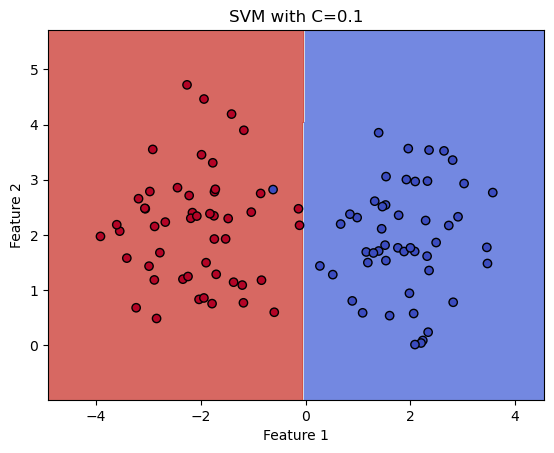

Improved Train Accuracy: 0.99
Improved Test (LOO CV) Accuracy: 0.99


In [36]:
# Train SVM with a different value of C
clf_improved = SVC(kernel='linear', C=0.1)
clf_improved.fit(X, y)

# Plot the improved decision boundary
plot_decision_boundary(clf_improved, X, y, "SVM with C=0.1")

# Calculate performance
y_true_improved, y_pred_improved = [], []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf_improved.fit(X_train, y_train)
    y_true_improved.append(y_test[0])
    y_pred_improved.append(clf_improved.predict(X_test)[0])

train_accuracy_improved = accuracy_score(y, clf_improved.predict(X))
test_accuracy_improved = accuracy_score(y_true_improved, y_pred_improved)

print(f"Improved Train Accuracy: {train_accuracy_improved:.2f}")
print(f"Improved Test (LOO CV) Accuracy: {test_accuracy_improved:.2f}")


0      0.736175
1      0.160138
2      0.632488
3      0.192396
4      0.706221
         ...   
494    0.342166
495    0.190092
496    0.966590
497    0.123272
498    0.379032
Name: 0.729263, Length: 499, dtype: float64
0      0.644006
1      0.777047
2      0.915936
3      0.540497
4      0.516813
         ...   
494    0.958333
495    0.479825
496    0.425439
497    0.791667
498    0.581140
Name: 0.889620, Length: 499, dtype: float64


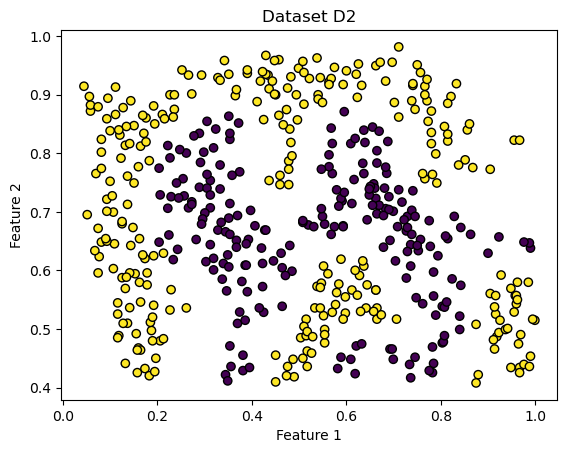

0      1.110502
1     -1.347385
2      0.087080
3     -1.539548
4      0.837267
         ...   
194   -0.202871
195    0.288780
196   -0.948480
197   -1.148611
198   -0.051909
Name: -0.983270, Length: 199, dtype: float64
0      0.449004
1      0.840500
2      1.676546
3     -0.106364
4      1.255638
         ...   
194   -0.718286
195    0.385646
196    1.247279
197    0.219613
198    1.968500
Name: 0.230644, Length: 199, dtype: float64


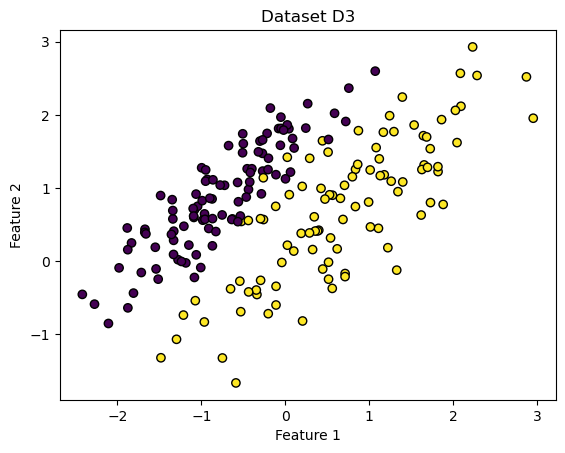

In [106]:
d2 = pd.read_csv("D2.csv")
d3 = pd.read_csv("D3.csv")

def plot_data(data, title):
    x = data.iloc[:, 0]
    y = data.iloc[:, 1]
    label = data.iloc[:,2]
    plt.scatter(x, y,c= label, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the datasets
plot_data(d2, "Dataset D2")
plot_data(d3, "Dataset D3")

By plot both D2 and D3, that D2 seems have non-linear speration, whereas D3 are linear serten way, but it have quite mixed scatter in the plots.

In [114]:
x_values = d2.iloc[0, 1].values
print(x_values)
y_values = d2.iloc[:,1].values


AttributeError: 'numpy.float64' object has no attribute 'values'

In [120]:
from sklearn.model_selection import GridSearchCV


X = d2.iloc[:, :-1].values
y = d2.iloc[:, -1].values


X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.3)


param_grid = [
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10]},
    {'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10]},
    {'kernel': ['poly'], 'C': [0.01, 0.1, 1, 10]}
]

model = SVC()

grid_search = GridSearchCV(model, param_grid, cv=loo, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")


Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.93


In [ ]:
from sklearn.model_selection import GridSearchCV


X = d3.iloc[:, :-1].values
y = d3.iloc[:, -1].values


X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.3)


param_grid = [
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10]},
    {'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10]},
    {'kernel': ['poly'], 'C': [0.01, 0.1, 1, 10]}
]

model = SVC()

grid_search = GridSearchCV(model, param_grid, cv=loo, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")
